<a href="https://colab.research.google.com/github/aarushijunejaa/Multithreading/blob/main/multithreading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import concurrent.futures
import pandas as pd
import psutil

In [ ]:
def multiply_matrices(constant_matrix, random_matrix):
    return np.matmul(random_matrix, constant_matrix)

In [ ]:
def get_cpu_usage():
    cpu_usage = psutil.cpu_percent(percpu=True)
    return cpu_usage

Time taken with 1 threads: 12.502631425857544 seconds
Time taken with 2 threads: 9.306427001953125 seconds
Time taken with 3 threads: 8.7870352268219 seconds
Time taken with 4 threads: 9.608268022537231 seconds
Time taken with 5 threads: 7.585103273391724 seconds
Time taken with 6 threads: 8.829861879348755 seconds
Time taken with 7 threads: 8.925078868865967 seconds
Time taken with 8 threads: 7.82206654548645 seconds

Table of Time Taken with Different Number of Threads:
   Number of Threads  Time Taken (seconds)       CPU Usage
0                  1             12.502631    [15.3, 15.1]
1                  2              9.306427  [100.0, 100.0]
2                  3              8.787035  [100.0, 100.0]
3                  4              9.608268  [100.0, 100.0]
4                  5              7.585103  [100.0, 100.0]
5                  6              8.829862  [100.0, 100.0]
6                  7              8.925079   [100.0, 99.9]
7                  8              7.822067  [100.0,

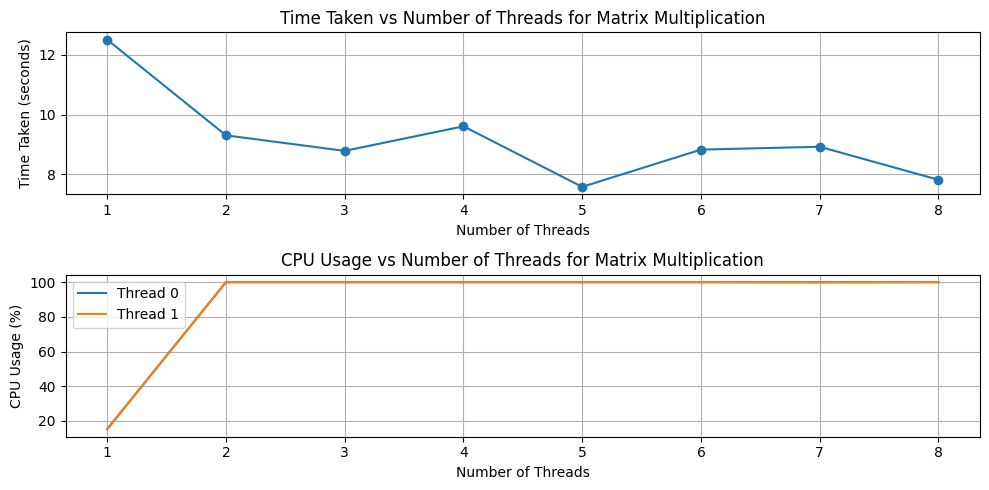

In [ ]:
def main():
    constant_matrix = np.random.rand(1000, 1000)  # Create a constant matrix
    num_threads_list = [1, 2, 3, 4, 5, 6, 7, 8]  # List of number of threads to test
    timings = []  # To store timings
    cpu_usages = []  # To store CPU usages

    for num_threads in num_threads_list:
        with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
            start_time = time.time()
            # Submit matrix multiplication tasks
            futures = [executor.submit(multiply_matrices, constant_matrix, np.random.rand(1000, 1000)) for _ in range(100)]
            # Retrieve results
            _ = [future.result() for future in concurrent.futures.as_completed(futures)]
            end_time = time.time()
            timings.append(end_time - start_time)
            print(f"Time taken with {num_threads} threads: {end_time - start_time} seconds")
            # Get CPU usage
            cpu_usages.append(get_cpu_usage())

            table_data = {
        "Number of Threads": num_threads_list,
        "Time Taken (seconds)": timings,
        "CPU Usage": cpu_usages
    }
    table_df = pd.DataFrame(table_data)
    print("\nTable of Time Taken with Different Number of Threads:")
    print(table_df)

    # Generate the graph for time taken
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(num_threads_list, timings, marker='o')
    plt.xlabel('Number of Threads')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Number of Threads for Matrix Multiplication')
    plt.xticks(num_threads_list)
    plt.grid(True)

    # Generate the graph for CPU usage
    plt.subplot(2, 1, 2)
    for i, cpu_usage in enumerate(np.array(cpu_usages).T):
        plt.plot(num_threads_list, cpu_usage, label=f'Thread {i}')
    plt.xlabel('Number of Threads')
    plt.ylabel('CPU Usage (%)')
    plt.title('CPU Usage vs Number of Threads for Matrix Multiplication')
    plt.xticks(num_threads_list)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
